<a href="https://colab.research.google.com/github/PotatoSpudowski/Graph_convolution_basics/blob/master/Graph_convolution_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import networkx as nx

In [0]:
A = np.matrix([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 0, 0]],
    dtype=float
)
 
G = nx.from_numpy_matrix(A) 

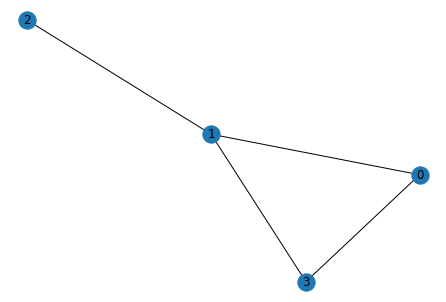

In [34]:
nx.draw(G, with_labels=True)

In [4]:
a = [1,0]
b = [0,1]

X = np.matrix([a,b,a,b]) #features 
X

matrix([[1, 0],
        [0, 1],
        [1, 0],
        [0, 1]])

###Propogation rule

In [5]:
A @ X

matrix([[0., 1.],
        [1., 1.],
        [0., 1.],
        [1., 0.]])

In [0]:
#  a b
#a 0 1   a is connected to 0 a and 1 b (Node 0) 
#b 1 1   b is connected to 1 a and 1 b (Node 1)
#a 0 1   a is connected to 0 a and 1 b (Node 2)
#b 1 0   b is connected to 1 a and 0 b (Node 3)

#The aggregated representation of a node does not include its own features!

In [8]:
I = np.matrix(np.eye(A.shape[0]))
I

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [9]:
A_hat = A + I
A_hat

matrix([[1., 1., 0., 0.],
        [0., 1., 1., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [10]:
A_hat @ X

matrix([[1., 1.],
        [1., 2.],
        [1., 1.],
        [1., 1.]])

In [0]:
#  a b
#a 1 1   a is connected to 1 a and 1 b (Node 0) 
#b 1 2   b is connected to 1 a and 2 b (Node 1)
#a 1 1   a is connected to 1 a and 1 b (Node 2)
#b 1 1   b is connected to 1 a and 1 b (Node 3)

#The aggregated representation of a node does include its own features!

In [0]:
#Now when we trying to normalize we get

In [12]:
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
D_hat

matrix([[2., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 2.]])

In [13]:
D_hat**-1 @ A_hat @ X

matrix([[0.5       , 0.5       ],
        [0.33333333, 0.66666667],
        [0.5       , 0.5       ],
        [0.5       , 0.5       ]])

In [0]:
#The matrix,
#matrix([[1., 1.],
        # [1., 2.],
        # [1., 1.],
        # [1., 1.]])
# is normalized to
#matrix([[0.5       , 0.5       ],
        # [0.33333333, 0.66666667],
        # [0.5       , 0.5       ],
        # [0.5       , 0.5       ]])

###A better way to normalize

In [23]:
D_hat_inv = np.sqrt(D_hat**-1)
H = D_hat_inv @ A_hat @ D_hat_inv @ X
H

matrix([[0.5       , 0.40824829],
        [0.40824829, 0.74158162],
        [0.5       , 0.40824829],
        [0.5       , 0.5       ]])

###Assigning weights

In [21]:
#Weights
np.random.seed(0)
W = 2*np.random.rand(2,5) - 1
W = np.matrix(W)
W

matrix([[ 0.09762701,  0.43037873,  0.20552675,  0.08976637, -0.1526904 ],
        [ 0.29178823, -0.12482558,  0.783546  ,  0.92732552, -0.23311696]])

###Finding the output of the hiiden layer

In [24]:
Z = H @ W
Z

matrix([[ 0.16793555,  0.16422954,  0.42264469,  0.42346224, -0.1715148 ],
        [ 0.25624085,  0.08313303,  0.66496926,  0.72433453, -0.23521085],
        [ 0.16793555,  0.16422954,  0.42264469,  0.42346224, -0.1715148 ],
        [ 0.19470762,  0.15277658,  0.49453638,  0.50854594, -0.19290368]])

###Now let's pass it through an activation function.

In [0]:
#Activation function
def relu(x):
    return np.maximum(0,x)

In [26]:
relu(Z)

matrix([[0.16793555, 0.16422954, 0.42264469, 0.42346224, 0.        ],
        [0.25624085, 0.08313303, 0.66496926, 0.72433453, 0.        ],
        [0.16793555, 0.16422954, 0.42264469, 0.42346224, 0.        ],
        [0.19470762, 0.15277658, 0.49453638, 0.50854594, 0.        ]])

##What happens when you add more layers to a grah convolutional network?

Unlike a traditional convolutional neural network, graph convolutional network usually have very few layers. 

The no of layers, represent amout of infromation from the neighbouring nodes. 

For example when we consider the same graph. For explaination purpose I wont be using normalization.

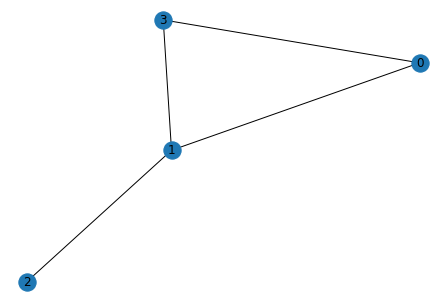

In [33]:
nx.draw(G, with_labels=True)

**0 = a,
1 = b,
2 = a,
3 = b**


In [35]:
print(A)

[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


###First layer

In [38]:
H1 = A_hat * X
H1

matrix([[1., 1.],
        [1., 2.],
        [1., 1.],
        [1., 1.]])

In [0]:
#  a b
#a 1 1   a is connected to 1 a and 1 b (Node 0) 
#b 1 2   b is connected to 1 a and 2 b (Node 1)
#a 1 1   a is connected to 1 a and 1 b (Node 2)
#b 1 1   b is connected to 1 a and 1 b (Node 3)

#The aggregated representation of a node does include its own features!

###Second Layer

In [39]:
H2 = A_hat * H1
H2

matrix([[2., 3.],
        [3., 4.],
        [2., 3.],
        [2., 2.]])

In [0]:
#  a b
#a 2 3   a is connected(Directly and Indirectly) to 2 a and 3 b (Node 0) 
#b 3 4   b is connected(Directly and Indirectly) to 3 a and 4 b (Node 1)
#a 2 3   a is connected(Directly and Indirectly) to 2 a and 3 b (Node 2)
#b 2 2   b is connected(Directly and Indirectly) to 2 a and 2 b (Node 3)

#The aggregated representation of a node does include its own features!